<a href="https://colab.research.google.com/github/RannellRobertson/Python-Deep-Learning-Projects/blob/main/pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jan  4 19:51:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Set up path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If image folder doesn't exist, dowload it and prepare it....
if image_path.is_dir():
  print(f"{image_path} directory already exist. Skipping download...")
else:
  print(f"{image_path} directory doesn't exist. Preparing one now...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  resp = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data....")
  f.write(resp.content)

# Unzip pizza steak sushi zipfile
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza steak and sushi zipfile...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory doesn't exist. Preparing one now...
Unzipping pizza steak and sushi zipfile...


In [5]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [6]:
# Setup train and testing paths
training_dir = image_path / "train"

testing_dir = image_path / "test"

training_dir, testing_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/sushi/3081701.jpg
Image class: sushi
Image height: 512
Image width: 512


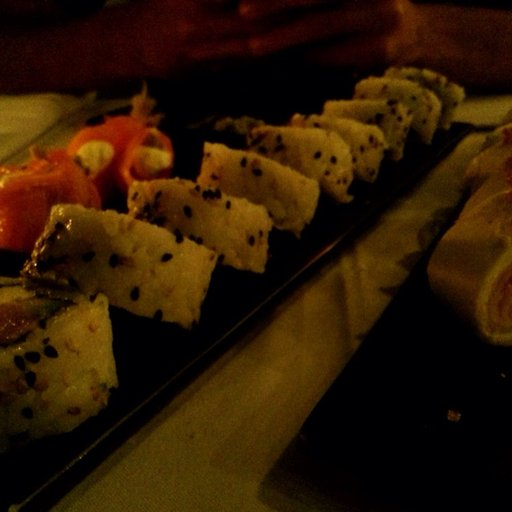

In [7]:
# Visualize an image
import random
from PIL import Image

# Set random seed
# random.seed(42)

# Get all image path
image_path_list: list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)

# print(random_image_path)

# Get image class from path name (the image class is
# the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# print(image_class)

# Open image
img = Image.open(random_image_path)

# Print some metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Random image path: data/pizza_steak_sushi/train/sushi/2871052.jpg
Image height: 512
Image width: 512


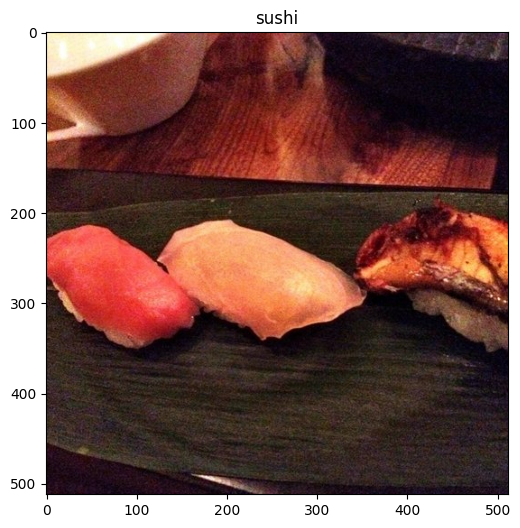

In [8]:
# Do the image visualization with matplotlib
import matplotlib.pyplot as plt

# Pick a random image path
random_image_path = random.choice(image_path_list)

# print(random_image_path)

# Get image class from path name (the image class is
# the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

plt.figure(figsize=(8, 6))
plt.title(image_class)
plt.imshow(img);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [9]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [10]:
# Write transform for turning images into tensors
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5)
])

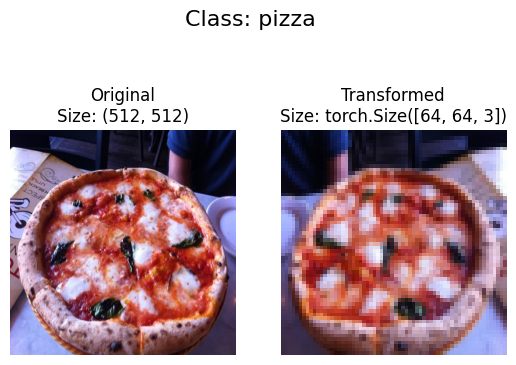

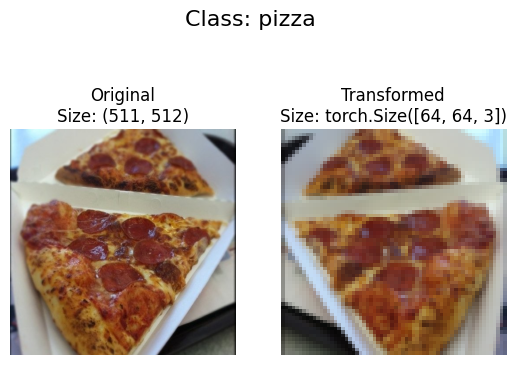

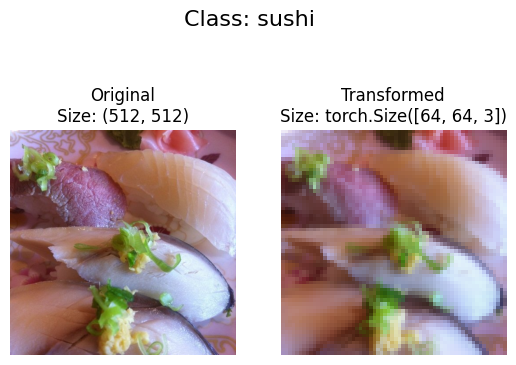

In [11]:
# Write a function to plot transformed images
def plot_transformed_images(image_path, transform, n=3, seed=None):
  """
  Selects random image from a path of images, loads/transforms
  them and then plots the original vs the transformed version.
  """
  if seed: random.seed(seed)

  random_image_paths = random.sample(image_path, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # Note: we will need to change shape for matplotlib (C, H, W) -> (H, W, C)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

### Load image data using `ImageFolder`

In [12]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(
    root=training_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=testing_dir,
    transform=data_transform,
    target_transform=None
)

In [13]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
import os

BATCH_SIZE: int = 1
NUM_WORKERS: int = os.cpu_count()

# Turn train and test Datasets into DataLoaders
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ecb39abe950>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecb39abd180>)

In [20]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [89]:
from torch import nn

class TinyVGG(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super(TinyVGG, self).__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*53*53,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)

    x = self.conv_block_2(x)
    # print(x.shape)

    x = self.classifer(x)
    return x

In [33]:
model_0 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data.classes)
).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for `model_0`.

In [22]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):

    # Send data to target device
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [35]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for X, y in dataloader:

      # Send data to target device
      X = X.to(device)
      y = y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = torch.argmax(test_pred_logits, dim=1)
      test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc

In [24]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [29]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [36]:
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0983 | train_acc: 0.3467 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.3467 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.0997 | test_acc: 0.3333


{'train_loss': [1.098383731842041,
  1.098333888583713,
  1.098320204416911,
  1.0983693594402737,
  1.098388319545322],
 'train_acc': [0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667],
 'test_loss': [1.0997077989578248,
  1.099809209505717,
  1.0996726449330647,
  1.099635508855184,
  1.0996767330169677],
 'test_acc': [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333]}

In [37]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [38]:
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1051 | train_acc: 0.3511 | test_loss: 1.0994 | test_acc: 0.3467
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3333 | test_loss: 1.1100 | test_acc: 0.4533
Epoch: 3 | train_loss: 1.1125 | train_acc: 0.4089 | test_loss: 1.0966 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0924 | train_acc: 0.4800 | test_loss: 1.0679 | test_acc: 0.5333
Epoch: 5 | train_loss: 1.0218 | train_acc: 0.5644 | test_loss: 1.0184 | test_acc: 0.4933
Epoch: 6 | train_loss: 0.9679 | train_acc: 0.5556 | test_loss: 1.0176 | test_acc: 0.3867
Epoch: 7 | train_loss: 0.9012 | train_acc: 0.5733 | test_loss: 1.0097 | test_acc: 0.3733
Epoch: 8 | train_loss: 0.8756 | train_acc: 0.5867 | test_loss: 1.0621 | test_acc: 0.4133
Epoch: 9 | train_loss: 0.8659 | train_acc: 0.6089 | test_loss: 1.0167 | test_acc: 0.4267
Epoch: 10 | train_loss: 0.8161 | train_acc: 0.6311 | test_loss: 1.0103 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.7610 | train_acc: 0.6889 | test_loss: 1.2168 | test_acc: 0.4400
Epoch: 12 | train_l

{'train_loss': [1.1050785377290513,
  1.0987210512161254,
  1.1125040932496388,
  1.0923655117882622,
  1.0218298757738538,
  0.9678514036536217,
  0.9012429429839055,
  0.8756124949372477,
  0.8658705890683147,
  0.8160986993974074,
  0.7610224895800154,
  0.712494682837019,
  0.6645748755594508,
  0.6052378309558601,
  0.5831676559966056,
  0.5080342041760054,
  0.4516195331381621,
  0.4734371198477614,
  0.37759193401704366,
  0.42177774021241776],
 'train_acc': [0.3511111111111111,
  0.3333333333333333,
  0.4088888888888889,
  0.48,
  0.5644444444444444,
  0.5555555555555556,
  0.5733333333333334,
  0.5866666666666667,
  0.6088888888888889,
  0.6311111111111111,
  0.6888888888888889,
  0.7244444444444444,
  0.7466666666666667,
  0.7688888888888888,
  0.7466666666666667,
  0.7822222222222223,
  0.8177777777777778,
  0.8044444444444444,
  0.8488888888888889,
  0.8533333333333334],
 'test_loss': [1.0993964846928914,
  1.1100370343526205,
  1.0965987936655681,
  1.067903202374776,
  1.

In [39]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [40]:
train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3178 | train_acc: 0.8978 | test_loss: 1.9076 | test_acc: 0.4800
Epoch: 2 | train_loss: 0.3165 | train_acc: 0.8800 | test_loss: 1.9868 | test_acc: 0.4400
Epoch: 3 | train_loss: 0.3343 | train_acc: 0.8622 | test_loss: 2.0390 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.2372 | train_acc: 0.9111 | test_loss: 2.3449 | test_acc: 0.4667
Epoch: 5 | train_loss: 0.1901 | train_acc: 0.9156 | test_loss: 2.7130 | test_acc: 0.4800
Epoch: 6 | train_loss: 0.2167 | train_acc: 0.9200 | test_loss: 2.5113 | test_acc: 0.4933
Epoch: 7 | train_loss: 0.1637 | train_acc: 0.9467 | test_loss: 2.7994 | test_acc: 0.4533
Epoch: 8 | train_loss: 0.2024 | train_acc: 0.9244 | test_loss: 2.9879 | test_acc: 0.4267
Epoch: 9 | train_loss: 0.1533 | train_acc: 0.9378 | test_loss: 3.4221 | test_acc: 0.4267
Epoch: 10 | train_loss: 0.1597 | train_acc: 0.9422 | test_loss: 3.1131 | test_acc: 0.5200
Epoch: 11 | train_loss: 0.1640 | train_acc: 0.9333 | test_loss: 2.9436 | test_acc: 0.5333
Epoch: 12 | train_l

{'train_loss': [0.3177914784557985,
  0.3165414689060165,
  0.3343312372581756,
  0.23720899366303508,
  0.19008922746489973,
  0.2166614895414208,
  0.16368288159663072,
  0.20235934211644374,
  0.15330928690498474,
  0.15967619565078167,
  0.16401900760126478,
  0.09602354112464702,
  0.07166068825116813,
  0.16027363645064518,
  0.11713988415006242,
  0.13882634500182794,
  0.09228093969872327,
  0.09821725963659092,
  0.051096414331796736,
  0.10355660832254374,
  0.127201077654989,
  0.1846658561510935,
  0.0594009635266418,
  0.038385191618351466,
  0.042864717958876496,
  0.03585481741821954,
  0.017584626157101265,
  0.009949309411812142,
  0.2635771588872525,
  0.03317555501039414,
  0.03597603511280344,
  0.010600131750862324,
  0.011374287228877462,
  0.20652778360092497,
  0.13250838425963204,
  0.030332615155006123,
  0.01625703088906909,
  0.023627609785970536,
  0.012839720765206866,
  0.010864542299688777,
  0.0068156675412168015,
  0.002882332805018848,
  0.00177921719

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [42]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(
    input_shape=3,
    hidden_units=20,
    output_shape=len(train_data.classes)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1106 | train_acc: 0.2889 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0999 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3333 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1019 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1016 | test_acc: 0.3333
Epoch: 12 | train_l

{'train_loss': [1.1105757864316304,
  1.099264563454522,
  1.09906281153361,
  1.098890324168735,
  1.0987717379464044,
  1.0989823325475057,
  1.0987052742640178,
  1.0986715698242187,
  1.0985804907480876,
  1.0987470102310182,
  1.098639791806539,
  1.0988086472617256,
  1.098759930928548,
  1.098656865755717,
  1.0987041431003146,
  1.098648009830051,
  1.0987615447574193,
  1.0987425666385227,
  1.098708308537801,
  1.0988229762183295],
 'train_acc': [0.28888888888888886,
  0.29333333333333333,
  0.3466666666666667,
  0.3466666666666667,
  0.3333333333333333,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667,
  0.3466666666666667],
 'test_loss': [1.0992531776428223,
  1.0999265162150065,
  1.1001951169967652,
  1.10031152566274,

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [43]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [44]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [45]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [125]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Create datasets
train_20_percent_dataset = ImageFolder(
    root=train_data_20_percent_path,
    transform=simple_transform,
    target_transform=None
)

test_20_percent_dataset = ImageFolder(
    root=test_data_20_percent_path,
    transform=simple_transform,
    target_transform=None
)


# Create dataloaders
train_20_percent_dataloader = DataLoader(
    dataset=train_20_percent_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_20_percent_dataloader = DataLoader(
    dataset=test_20_percent_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [121]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_20_percent_dataset.classes)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

model_0_results = train(model=model_0,
      train_dataloader=train_20_percent_dataloader,
      test_dataloader=test_20_percent_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1228 | train_acc: 0.3156 | test_loss: 1.1003 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0990 | train_acc: 0.3222 | test_loss: 1.1004 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.0990 | train_acc: 0.3244 | test_loss: 1.1008 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3022 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3422 | test_loss: 1.1011 | test_acc: 0.3067
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3422 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 7 | train_loss: 1.0990 | train_acc: 0.3156 | test_loss: 1.1010 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1007 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1005 | test_acc: 0.3067
Epoch: 10 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1008 | test_acc: 0.3067
Epoch: 11 | train_loss: 1.0990 | train_acc: 0.3422 | test_loss: 1.1006 | test_acc: 0.3067
Epoch: 12 | train_l

In [97]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a result'd dictionary"""
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  acc = results["train_acc"]
  test_acc = results["test_acc"]

  # Figure out the number of epochs
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

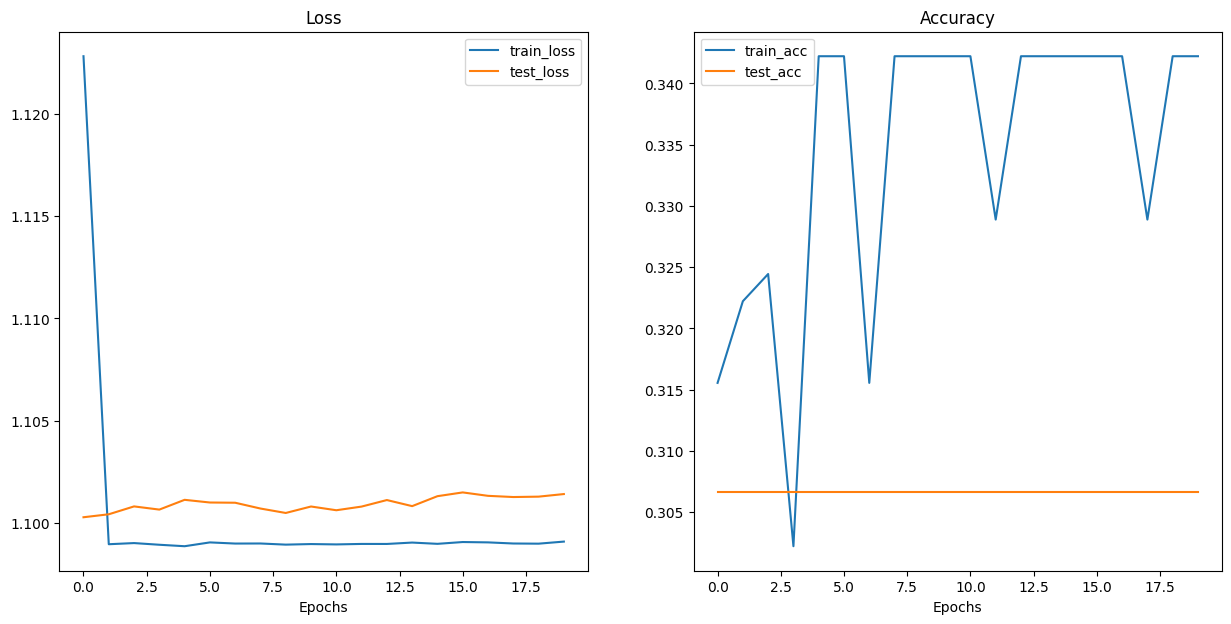

In [122]:
plot_loss_curves(results=model_0_results)

In [182]:
from torch import nn

class TinyVGG2(nn.Module):
  """
  This CNN model doubles the number of conv blocks
  and a kernel size of 2 in each conv block.
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super(TinyVGG2, self).__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=2,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*12*12,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)

    x = self.conv_block_2(x)
    # print(x.shape)

    x = self.conv_block_3(x)
    # print(x.shape)

    x = self.conv_block_4(x)
    # print(x.shape)

    x = self.classifer(x)
    return x

In [132]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG2(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_20_percent_dataset.classes)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.01)

model_1_results = train(model=model_1,
      train_dataloader=train_20_percent_dataloader,
      test_dataloader=test_20_percent_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1222 | train_acc: 0.3533 | test_loss: 1.1095 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.1033 | train_acc: 0.2933 | test_loss: 1.1077 | test_acc: 0.3067
Epoch: 3 | train_loss: 1.1028 | train_acc: 0.3022 | test_loss: 1.0965 | test_acc: 0.3867
Epoch: 4 | train_loss: 1.1034 | train_acc: 0.3089 | test_loss: 1.1041 | test_acc: 0.3067
Epoch: 5 | train_loss: 1.1024 | train_acc: 0.3311 | test_loss: 1.1084 | test_acc: 0.3067
Epoch: 6 | train_loss: 1.1027 | train_acc: 0.3311 | test_loss: 1.1030 | test_acc: 0.3067
Epoch: 7 | train_loss: 1.1028 | train_acc: 0.3289 | test_loss: 1.1092 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.1038 | train_acc: 0.3222 | test_loss: 1.1184 | test_acc: 0.3067
Epoch: 9 | train_loss: 1.1049 | train_acc: 0.3156 | test_loss: 1.0982 | test_acc: 0.3067
Epoch: 10 | train_loss: 1.1037 | train_acc: 0.2956 | test_loss: 1.1124 | test_acc: 0.3067
Epoch: 11 | train_loss: 1.1016 | train_acc: 0.3156 | test_loss: 1.0970 | test_acc: 0.3867
Epoch: 12 | train_l

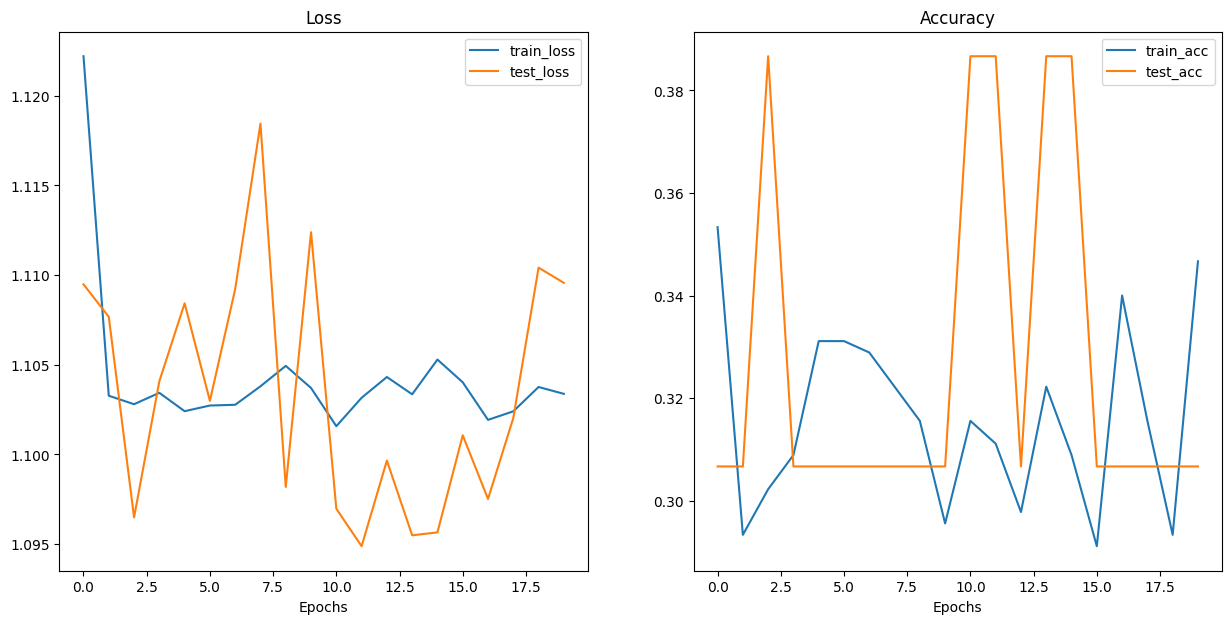

In [133]:
plot_loss_curves(model_1_results)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [52]:
from pathlib import PosixPath
import requests

# Function to download a specfic image from the internet
def download_custom_image(custom_image_path: str | PosixPath, url: str):
  if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
      resp = requests.get(url)
      print(f"Downloading {custom_image_path}...")
      f.write(resp.content)
  else:
    print(f"{custom_image_path} already exist. Skipping download")


In [206]:
steak_image_path = data_path / "steak.jpeg"
sushi_image_path = data_path / "sushi(1).jpeg"
pizza_image_path = data_path / "pizza.jpeg"

steak_url = "https://raw.githubusercontent.com/RannellRobertson/Python-Deep-Learning-Projects/refs/heads/main/grilled-steak.jpeg"
sushi_url = "https://raw.githubusercontent.com/RannellRobertson/Python-Deep-Learning-Projects/refs/heads/main/tobiko-roll-1200.jpeg"
pizza_url = "https://raw.githubusercontent.com/RannellRobertson/Python-Deep-Learning-Projects/refs/heads/main/meat-lovers-pizza.jpg"

download_custom_image(steak_image_path, url=steak_url)
download_custom_image(sushi_image_path, url=sushi_url)
download_custom_image(pizza_image_path, url=pizza_url)

../data/food-101/images/steak.jpeg already exist. Skipping download
../data/food-101/images/pizza.jpeg already exist. Skipping download


In [207]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(sushi_image_path)
print(f"Custom Image Tensor: \n{custom_image_uint8}\n")
print(f"Custom Image Shape: \n{custom_image_uint8.shape}\n")
print(f"Custom Image Datatype: \n{custom_image_uint8.dtype}\n")

Custom Image Tensor: 
tensor([[[ 68,  68,  68,  ..., 183, 182, 182],
         [ 69,  69,  69,  ..., 183, 182, 182],
         [ 70,  70,  70,  ..., 183, 183, 183],
         ...,
         [  9,   6,   4,  ..., 197, 184, 165],
         [ 13,   9,   4,  ..., 178, 152, 130],
         [ 18,  12,   6,  ..., 135, 124, 124]],

        [[ 69,  69,  69,  ..., 178, 177, 177],
         [ 70,  70,  70,  ..., 178, 177, 177],
         [ 71,  71,  71,  ..., 178, 178, 178],
         ...,
         [ 41,  38,  36,  ..., 217, 205, 186],
         [ 46,  42,  37,  ..., 199, 170, 148],
         [ 51,  45,  39,  ..., 156, 142, 142]],

        [[ 71,  71,  71,  ..., 174, 173, 173],
         [ 72,  72,  72,  ..., 174, 173, 173],
         [ 73,  73,  73,  ..., 174, 174, 174],
         ...,
         [ 82,  79,  77,  ..., 241, 226, 207],
         [ 87,  83,  78,  ..., 220, 192, 170],
         [ 92,  86,  80,  ..., 177, 164, 164]]], dtype=torch.uint8)

Custom Image Shape: 
torch.Size([3, 1200, 1200])

Custom Image D

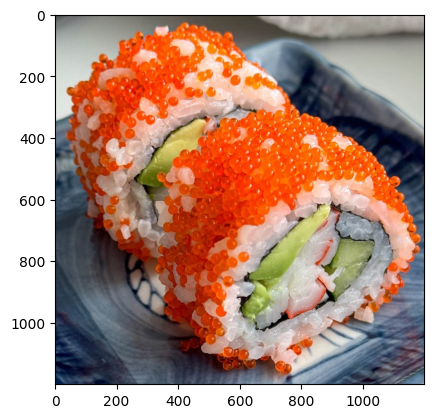

In [208]:
plt.imshow(custom_image_uint8.permute(1, 2, 0));

In [209]:
# Load custom image and convert it into torch.float32
custom_image = torchvision.io.read_image(sushi_image_path).type(torch.float32) / 255
custom_image

tensor([[[0.2667, 0.2667, 0.2667,  ..., 0.7176, 0.7137, 0.7137],
         [0.2706, 0.2706, 0.2706,  ..., 0.7176, 0.7137, 0.7137],
         [0.2745, 0.2745, 0.2745,  ..., 0.7176, 0.7176, 0.7176],
         ...,
         [0.0353, 0.0235, 0.0157,  ..., 0.7725, 0.7216, 0.6471],
         [0.0510, 0.0353, 0.0157,  ..., 0.6980, 0.5961, 0.5098],
         [0.0706, 0.0471, 0.0235,  ..., 0.5294, 0.4863, 0.4863]],

        [[0.2706, 0.2706, 0.2706,  ..., 0.6980, 0.6941, 0.6941],
         [0.2745, 0.2745, 0.2745,  ..., 0.6980, 0.6941, 0.6941],
         [0.2784, 0.2784, 0.2784,  ..., 0.6980, 0.6980, 0.6980],
         ...,
         [0.1608, 0.1490, 0.1412,  ..., 0.8510, 0.8039, 0.7294],
         [0.1804, 0.1647, 0.1451,  ..., 0.7804, 0.6667, 0.5804],
         [0.2000, 0.1765, 0.1529,  ..., 0.6118, 0.5569, 0.5569]],

        [[0.2784, 0.2784, 0.2784,  ..., 0.6824, 0.6784, 0.6784],
         [0.2824, 0.2824, 0.2824,  ..., 0.6824, 0.6784, 0.6784],
         [0.2863, 0.2863, 0.2863,  ..., 0.6824, 0.6824, 0.

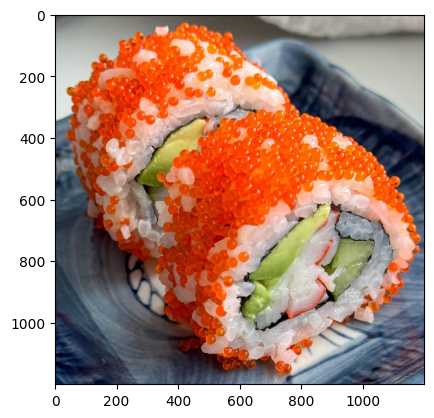

In [210]:
plt.imshow(custom_image.permute(1, 2, 0));

In [211]:
from torchvision import transforms

# Create a transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5)
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

custom_image_transformed.shape, custom_image.shape

(torch.Size([3, 224, 224]), torch.Size([3, 1200, 1200]))

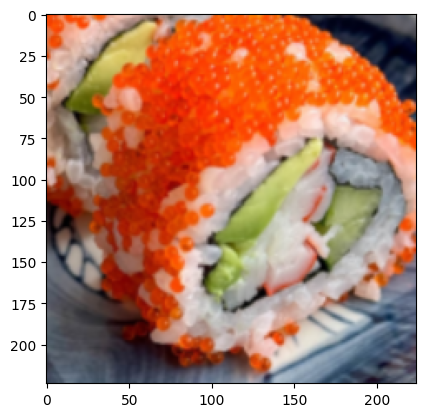

In [212]:
plt.imshow(custom_image_transformed.permute(1, 2, 0));

In [213]:
# Trying to make a prediction on an image in uint8 format
model_0.eval()

with torch.inference_mode():
  custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))

custom_image_pred

tensor([[ 0.4185, -2.3394,  0.7954]], device='cuda:0')

In [214]:
# Converts logits -> prediction probabilities
custom_image_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_probs

tensor([[0.3966, 0.0252, 0.5782]], device='cuda:0')

In [215]:
# Converts prediction probabilities -> prediction labels
custom_image_label = torch.argmax(custom_image_probs, dim=1)
custom_image_label

tensor([2], device='cuda:0')

In [203]:
class_names

['pizza', 'steak', 'sushi']

In [143]:
def predict_and_plot_image(image_path: str,
                           model: nn.Module,
                           transform=None,
                           class_names: List[str] = None,
                           device: torch.device = "cpu"):
  """
  This function makes a prediction on a target image
  with a trained model and plots the image and prediction.
  """

  # Load in image, convert it into torch.float32
  # and divide image pixel values by 255 to get
  # them in range of [0, 1]
  target_image = torchvision.io.read_image(image_path).type(torch.float32) / 255

  # Transform data if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure model is on target device
  model.to(device)

  # Turn on eval/prediction mode and make a prediction
  model.eval()

  with torch.inference_mode():
    # Add an extra dimension to the image (batch dimension
    # which our model will predict on)
    target_image = target_image.unsqueeze(dim=0).to(device) # Make target image is on the right device

    # Make a prediction on the image with the extra dimension
    target_image_pred = model(target_image)

  # Convert the mode's raw logits -> prediction probabilities
  target_image_probs = torch.softmax(target_image_pred, dim=1)

  # Convert prediction probabilities -> prediction label
  target_image_pred_label = torch.argmax(target_image_probs, dim=1)

  # Plot image along side prediction and prediction probabilities
  plt.imshow(target_image.squeeze(dim=0).permute(1, 2, 0).cpu()) # Remove batch dimension and rearrange to [H, W, C]

  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label.item()} | Prob: {target_image_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)

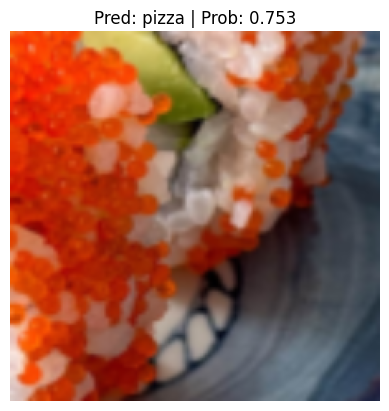

In [217]:
predict_and_plot_image(image_path=sushi_image_path,
                       transform=custom_image_transform,
                       model=model_1,
                       class_names=class_names,
                       device=device)

In [145]:
# Setup data directory
import pathlib

data_dir = pathlib.Path("../data")

In [146]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 5.00G/5.00G [07:56<00:00, 10.5MB/s]


Extracting ../data/food-101.tar.gz to ../data


In [147]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [169]:
# Get random 10% of training images
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = ["pizza", "steak", "sushi"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.8

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["pizza", "steak", "sushi"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 1800 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 600 images for test...


[PosixPath('../data/food-101/images/pizza/3269634.jpg'),
 PosixPath('../data/food-101/images/pizza/1524655.jpg'),
 PosixPath('../data/food-101/images/steak/2825100.jpg'),
 PosixPath('../data/food-101/images/steak/225990.jpg'),
 PosixPath('../data/food-101/images/steak/1839481.jpg'),
 PosixPath('../data/food-101/images/pizza/38349.jpg'),
 PosixPath('../data/food-101/images/pizza/3018077.jpg'),
 PosixPath('../data/food-101/images/sushi/93139.jpg'),
 PosixPath('../data/food-101/images/pizza/2702825.jpg'),
 PosixPath('../data/food-101/images/sushi/200025.jpg')]

In [170]:
# Create target directory path
target_dir_name = f"../data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/pizza_steak_sushi_80_percent'


In [171]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/pizza/3269634.jpg to ../data/pizza_steak_sushi_80_percent/train/pizza/3269634.jpg...
[INFO] Copying ../data/food-101/images/pizza/1524655.jpg to ../data/pizza_steak_sushi_80_percent/train/pizza/1524655.jpg...
[INFO] Copying ../data/food-101/images/steak/2825100.jpg to ../data/pizza_steak_sushi_80_percent/train/steak/2825100.jpg...
[INFO] Copying ../data/food-101/images/steak/225990.jpg to ../data/pizza_steak_sushi_80_percent/train/steak/225990.jpg...
[INFO] Copying ../data/food-101/images/steak/1839481.jpg to ../data/pizza_steak_sushi_80_percent/train/steak/1839481.jpg...
[INFO] Copying ../data/food-101/images/pizza/38349.jpg to ../data/pizza_steak_sushi_80_percent/train/pizza/38349.jpg...
[INFO] Copying ../data/food-101/images/pizza/3018077.jpg to ../data/pizza_steak_sushi_80_percent/train/pizza/3018077.jpg...
[INFO] Copying ../data/food-101/images/sushi/93139.jpg to ../data/pizza_steak_sushi_80_percent/train/sushi/93139.jpg...
[INFO] Copying ../

In [172]:
# See how many images we have
walk_through_dir(target_dir)

There are 2 directories and 0 images in '../data/pizza_steak_sushi_80_percent'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_80_percent/train'.
There are 0 directories and 606 images in '../data/pizza_steak_sushi_80_percent/train/steak'.
There are 0 directories and 605 images in '../data/pizza_steak_sushi_80_percent/train/pizza'.
There are 0 directories and 589 images in '../data/pizza_steak_sushi_80_percent/train/sushi'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi_80_percent/test'.
There are 0 directories and 202 images in '../data/pizza_steak_sushi_80_percent/test/steak'.
There are 0 directories and 193 images in '../data/pizza_steak_sushi_80_percent/test/pizza'.
There are 0 directories and 205 images in '../data/pizza_steak_sushi_80_percent/test/sushi'.


In [174]:
# Create the train and test paths
train_data_80_percent_path = target_dir / "train"
test_data_80_percent_path = target_dir / "test"

train_data_80_percent_path, test_data_80_percent_path

(PosixPath('../data/pizza_steak_sushi_80_percent/train'),
 PosixPath('../data/pizza_steak_sushi_80_percent/test'))

In [176]:
# Turn the 80 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

BATCH_SIZE: int = 32

transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Create datasets
train_80_percent_dataset = ImageFolder(
    root=train_data_80_percent_path,
    transform=transform,
    target_transform=None
)

test_80_percent_dataset = ImageFolder(
    root=test_data_80_percent_path,
    transform=transform,
    target_transform=None
)


# Create dataloaders
train_80_percent_dataloader = DataLoader(
    dataset=train_80_percent_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_80_percent_dataloader = DataLoader(
    dataset=test_80_percent_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [177]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(
    input_shape=3,
    hidden_units=40,
    output_shape=len(train_80_percent_dataset.classes)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

model_0_results = train(model=model_0,
      train_dataloader=train_80_percent_dataloader,
      test_dataloader=test_80_percent_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=20
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0378 | train_acc: 0.4890 | test_loss: 0.9134 | test_acc: 0.5932
Epoch: 2 | train_loss: 0.9299 | train_acc: 0.5691 | test_loss: 0.8783 | test_acc: 0.6069
Epoch: 3 | train_loss: 0.8905 | train_acc: 0.5976 | test_loss: 0.8644 | test_acc: 0.5817
Epoch: 4 | train_loss: 0.9070 | train_acc: 0.5822 | test_loss: 0.8701 | test_acc: 0.6321
Epoch: 5 | train_loss: 0.8967 | train_acc: 0.5795 | test_loss: 0.8542 | test_acc: 0.6245
Epoch: 6 | train_loss: 0.8973 | train_acc: 0.5828 | test_loss: 0.8880 | test_acc: 0.5789
Epoch: 7 | train_loss: 0.8821 | train_acc: 0.5981 | test_loss: 0.8375 | test_acc: 0.6310
Epoch: 8 | train_loss: 0.8806 | train_acc: 0.6075 | test_loss: 0.8376 | test_acc: 0.6310
Epoch: 9 | train_loss: 0.8738 | train_acc: 0.6118 | test_loss: 0.7870 | test_acc: 0.6661
Epoch: 10 | train_loss: 0.8528 | train_acc: 0.6190 | test_loss: 0.8141 | test_acc: 0.6562
Epoch: 11 | train_loss: 0.8422 | train_acc: 0.6124 | test_loss: 0.7455 | test_acc: 0.6760
Epoch: 12 | train_l

In [184]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS: int = 20

model_1 = TinyVGG(
    input_shape=3,
    hidden_units=80,
    output_shape=len(train_80_percent_dataset.classes)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

model_1_results = train(model=model_1,
      train_dataloader=train_80_percent_dataloader,
      test_dataloader=test_80_percent_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=EPOCHS
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0251 | train_acc: 0.5066 | test_loss: 1.0220 | test_acc: 0.4951
Epoch: 2 | train_loss: 0.9730 | train_acc: 0.5334 | test_loss: 0.9690 | test_acc: 0.5444
Epoch: 3 | train_loss: 0.9458 | train_acc: 0.5751 | test_loss: 0.8642 | test_acc: 0.5899
Epoch: 4 | train_loss: 0.9086 | train_acc: 0.6009 | test_loss: 0.8595 | test_acc: 0.6009
Epoch: 5 | train_loss: 0.9053 | train_acc: 0.6025 | test_loss: 0.9255 | test_acc: 0.5373
Epoch: 6 | train_loss: 0.9070 | train_acc: 0.5877 | test_loss: 0.8700 | test_acc: 0.6266
Epoch: 7 | train_loss: 0.8983 | train_acc: 0.6014 | test_loss: 0.8670 | test_acc: 0.6009
Epoch: 8 | train_loss: 0.8886 | train_acc: 0.5998 | test_loss: 0.8553 | test_acc: 0.5883
Epoch: 9 | train_loss: 0.8978 | train_acc: 0.5938 | test_loss: 0.8859 | test_acc: 0.5839
Epoch: 10 | train_loss: 0.9001 | train_acc: 0.5938 | test_loss: 0.8808 | test_acc: 0.6003
Epoch: 11 | train_loss: 0.8779 | train_acc: 0.6228 | test_loss: 0.8815 | test_acc: 0.5894
Epoch: 12 | train_l

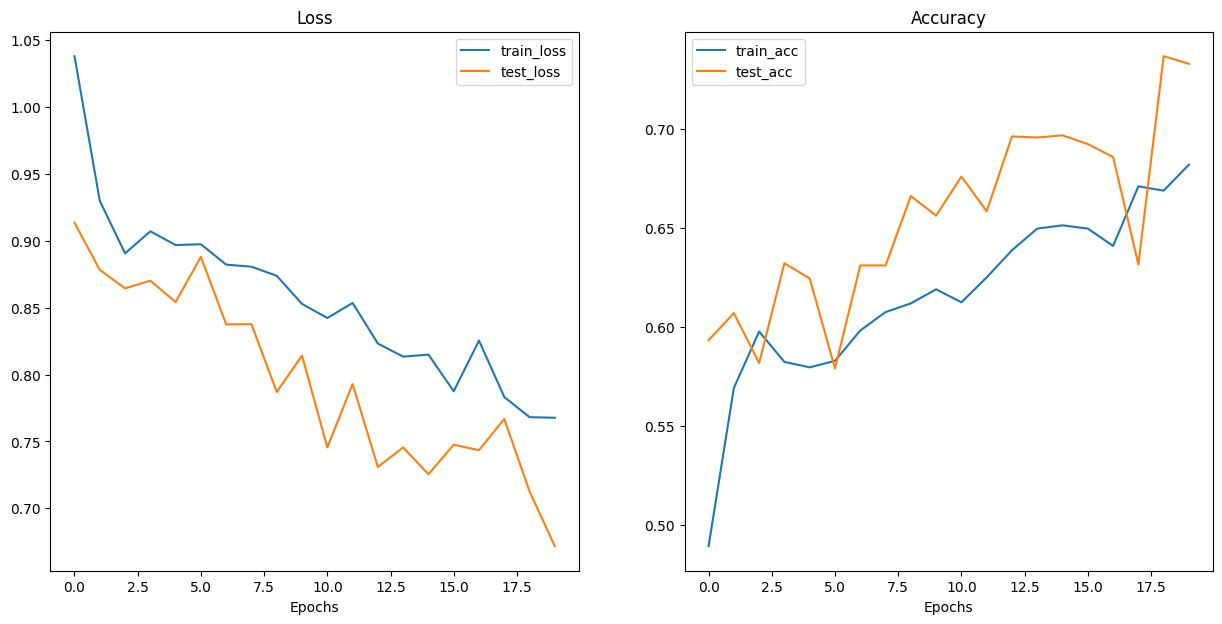

In [185]:
plot_loss_curves(model_0_results)

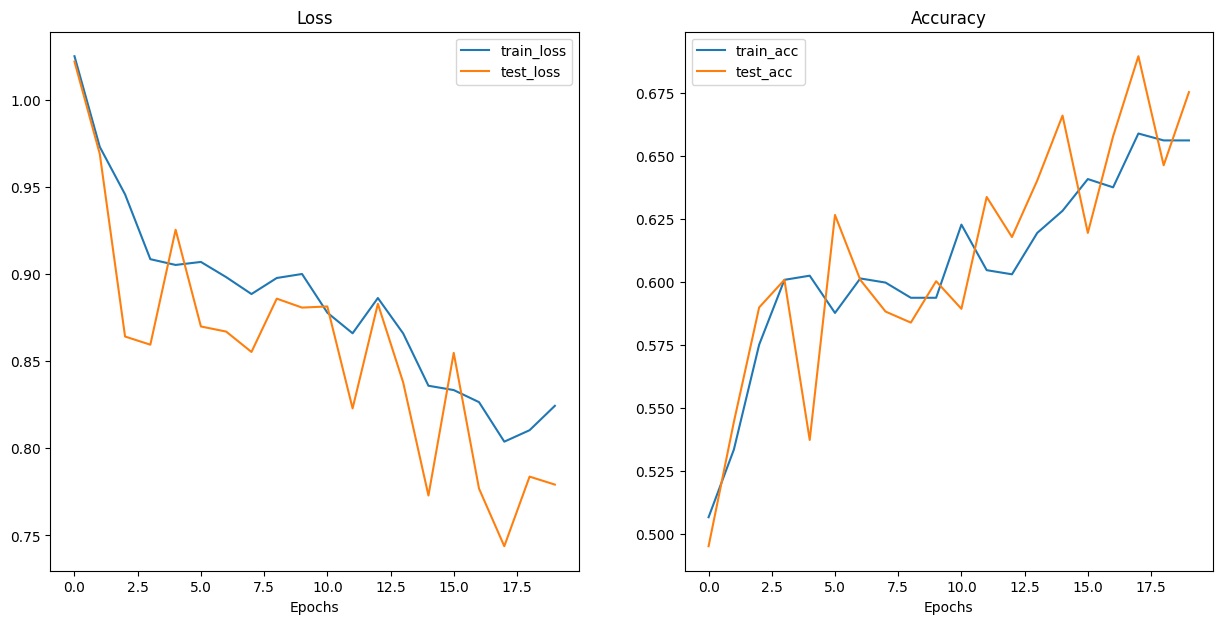

In [186]:
plot_loss_curves(model_1_results)

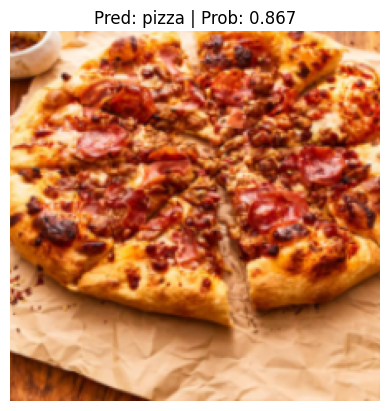

In [222]:
predict_and_plot_image(image_path=pizza_image_path,
                       transform=custom_image_transform,
                       model=model_0,
                       class_names=class_names,
                       device=device)